# MICRO CREDIT DEFAULTER 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 



# Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  


# Loading the Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
# Importing Dataset

df = pd.read_csv('Data file.csv')


In [ ]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [ ]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [ ]:
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [ ]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

# Details About The Columns


* label
 
      Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

* msisdn

      mobile number of user

* aon	

      age on cellular network in days

* daily_decr30	

      Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

* daily_decr90	

      Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

* rental30	

      Average main account balance over last 30 days

* rental90	

      Average main account balance over last 90 days

* last_rech_date_ma	

      Number of days till last recharge of main account

* last_rech_date_da	

      Number of days till last recharge of data account

* last_rech_amt_ma	

      Amount of last recharge of main account (in Indonesian Rupiah)

* cnt_ma_rech30	

      Number of times main account got recharged in last 30 days

* fr_ma_rech30	

      Frequency of main account recharged in last 30 days

* sumamnt_ma_rech30	

      Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

* medianamnt_ma_rech30	

      Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

* medianmarechprebal30	

      Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

* cnt_ma_rech90	

      Number of times main account got recharged in last 90 days

* fr_ma_rech90	

      Frequency of main account recharged in last 90 days

* sumamnt_ma_rech90	

      Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

* medianamnt_ma_rech90	

      Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

* medianmarechprebal90	

      Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

* cnt_da_rech30	

      Number of times data account got recharged in last 30 days

* fr_da_rech30	

      Frequency of data account recharged in last 30 days

* cnt_da_rech90	

      Number of times data account got recharged in last 90 days
 
* fr_da_rech90	

      Frequency of data account recharged in last 90 days

* cnt_loans30	

      Number of loans taken by user in last 30 days

* amnt_loans30	

      Total amount of loans taken by user in last 30 days
   
* maxamnt_loans30	

       maximum amount of loan taken by the user in last 30 days

* medianamnt_loans30	

      Median of amounts of loan taken by the user in last 30 days

* cnt_loans90

      Number of loans taken by user in last 90 days

* amnt_loans90	

      Total amount of loans taken by user in last 90 days

* maxamnt_loans90	

      maximum amount of loan taken by the user in last 90 days

* medianamnt_loans90	

      Median of amounts of loan taken by the user in last 90 days

* payback30	

      Average payback time in days over last 30 days

* payback90	

      Average payback time in days over last 90 days

* pcircle	

      telecom circle

* pdate	

      date


# Data Exploration

In [ ]:
cat_cols=df.select_dtypes([object])

for col in cat_cols.columns:
    print(col)
    print(df[col].value_counts())
    print('--------------------------------------------------------------------------')

msisdn
04581I85330    7
47819I90840    7
30080I90588    6
55809I89238    6
22038I88658    6
              ..
36902I90840    1
17447I88689    1
59686I90584    1
00504I91190    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64
--------------------------------------------------------------------------
pcircle
UPW    209593
Name: pcircle, dtype: int64
--------------------------------------------------------------------------
pdate
2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64
--------------------------------------------------------------------------


In [ ]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


From the above table we can observe that "Unnamed:0" column is just the sl no column. So, we can drop this column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

We can observe from the above output that we have 3 types of dataypes in our dataset i.e. Int, object and float

We can observe from the above output that 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'medianmarechprebal30', 'medianmarechprebal90' columns have negative values in them.

But as per the caolumn lable only 'rental30' & 'rental90' column negative value is justifiable rest negative values are outlier.

So, we are going to drop those rows where we have negative values.

In [ ]:
df.drop(["Unnamed: 0"],axis=1, inplace =True)

In [ ]:
#Checking null values in the dataset

df.isnull().sum().any()

False

In [ ]:
df.duplicated().sum() # This will check the duplicate data for all columns.

1

In [ ]:
df.duplicated('msisdn').sum()  # This will check the duplicate data for all columns.

23350

In [ ]:
# Droping duplicate entries
df.drop_duplicates(keep='last',inplace=True)

In [ ]:
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

# Observation:
pcircle has only one entry throughout so it will have no contribution with our model training we can drop this feature.
msisdn is a feature with phone numbers of users so this feature has no contribution on model building.

In [ ]:
# Droping Unnamed: 0, msisdn and pcircle column
df.drop(["msisdn"],axis=1, inplace =True)
df.drop(["pcircle"],axis=1, inplace =True)

In [ ]:
# Converting Date datatypes and spliting date into date, month and year.

df['pdate']=pd.to_datetime(df['pdate'])
df['Day']=df['pdate'].apply(lambda x:x.day)
df['Month']=df['pdate'].apply(lambda x:x.month)
df['Year']=df['pdate'].apply(lambda x:x.year)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Day,Month,Year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7,2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8,2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8,2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6,2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6,2016


In [ ]:
#Droping pdate column after extraction

df.drop(['pdate','Year'],axis=1,inplace=True)

In [ ]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
label,209592.000000,0.875177,0.330519,0.000000,1.000000,1.000000,1.000000,1.000000
aon,209592.000000,8112.380399,75696.261220,-48.000000,246.000000,527.000000,982.000000,999860.755168
daily_decr30,209592.000000,5381.412999,9220.644093,-93.012667,42.439500,1469.091833,7244.096000,265926.000000
daily_decr90,209592.000000,6082.529123,10918.836919,-93.012667,42.691917,1500.000000,7802.795000,320630.000000
rental30,209592.000000,2692.578912,4308.596841,-23737.140000,280.417500,1083.540000,3356.945000,198926.110000
rental90,209592.000000,3483.407309,5770.475034,-24720.580000,300.260000,1334.000000,4201.792500,200148.110000
last_rech_date_ma,209592.000000,3755.865715,53906.020204,-29.000000,1.000000,3.000000,7.000000,998650.377733
last_rech_date_da,209592.000000,3712.220632,53374.960145,-29.000000,0.000000,0.000000,0.000000,999171.809410
last_rech_amt_ma,209592.000000,2064.458973,2370.790003,0.000000,770.000000,1539.000000,2309.000000,55000.000000
cnt_ma_rech30,209592.000000,3.978053,4.256099,0.000000,1.000000,3.000000,5.000000,203.000000


In [ ]:
#Converting all negative values to positive values in above columns

df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])

In [ ]:
df['maxamnt_loans30'].describe()

count    209592.000000
mean        274.660029
std        4245.274734
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max       99864.560864
Name: maxamnt_loans30, dtype: float64

We already know maximum loan amount taken by customers can be 0,5,10 and which can be repay with amount of 0,6,12. We gone replace values greater than 12 into category of zero.

We are making assumption here that loan amount greater than 12 to be replace with zero.

In [ ]:
# marking values greater than 12 and assign value zero to them.

df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0)
       & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0


In [ ]:
df['maxamnt_loans30'].value_counts()

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [ ]:
((df[df['last_rech_date_da'] == 0].value_counts().sum())/len(df['last_rech_date_da']))*100

96.78804534524218

last_rech_date_da contain more than 96% zero values , so this column will not have much value in prediction of label.

In [ ]:
df.drop(['last_rech_date_da'],axis=1,inplace=True)

# Checking for the Columns containing Null , Blank Or Empty Values

In [ ]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
Day                     0
Month                   0
dtype: int64

In [ ]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback30               float64
payback9

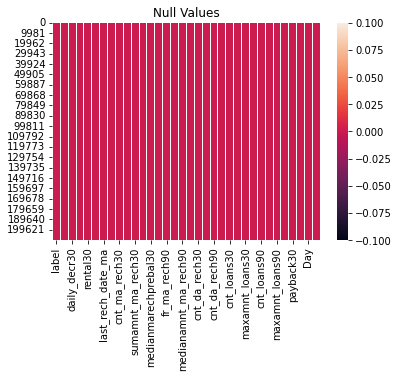

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

# Checking and Transforming the Data types of the Columns To Same DataTypes for Better Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209592 entries, 0 to 209592
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209592 non-null  int64  
 1   aon                   209592 non-null  float64
 2   daily_decr30          209592 non-null  float64
 3   daily_decr90          209592 non-null  float64
 4   rental30              209592 non-null  float64
 5   rental90              209592 non-null  float64
 6   last_rech_date_ma     209592 non-null  float64
 7   last_rech_amt_ma      209592 non-null  int64  
 8   cnt_ma_rech30         209592 non-null  int64  
 9   fr_ma_rech30          209592 non-null  float64
 10  sumamnt_ma_rech30     209592 non-null  float64
 11  medianamnt_ma_rech30  209592 non-null  float64
 12  medianmarechprebal30  209592 non-null  float64
 13  cnt_ma_rech90         209592 non-null  int64  
 14  fr_ma_rech90          209592 non-null  int64  
 15  

In [ ]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


We can sere that there are no object data type column in the data set ..
so we need no changes 

# Exploratory Data Analysis

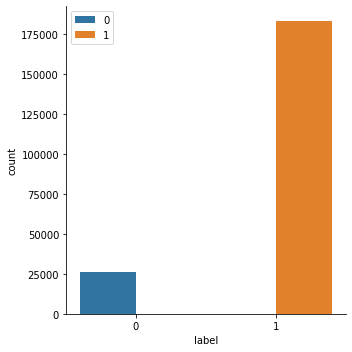

In [ ]:
#Lets check the count of each class in target varaible

sns.catplot(x='label',data=df,kind='count',hue='label')
plt.legend();


We can observe that our data is imbalanced with a huge numbers. Around 12.5% of the total issued loans were defaulted

In [ ]:
# Let's find out how many values of each class are there

df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

Percentage 1    0.875177
0    0.124823
Name: label, dtype: float64


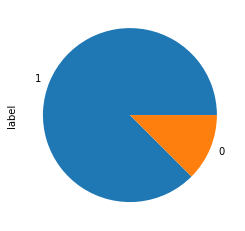

In [ ]:
#Let's plot a pie chart for label percentage in dataset

print('Percentage',df.label.value_counts(normalize=True));
df.label.value_counts().plot(kind='pie');

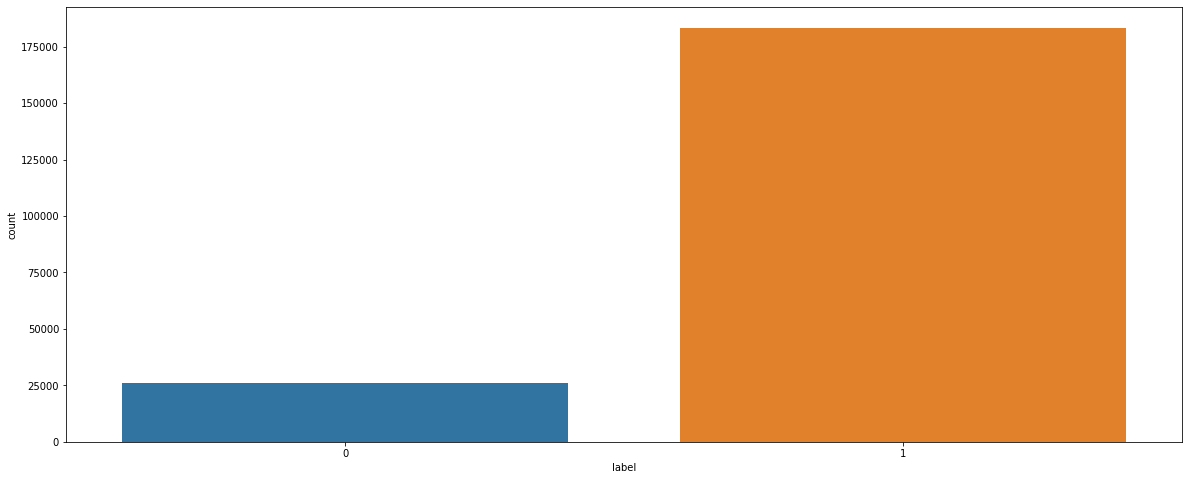

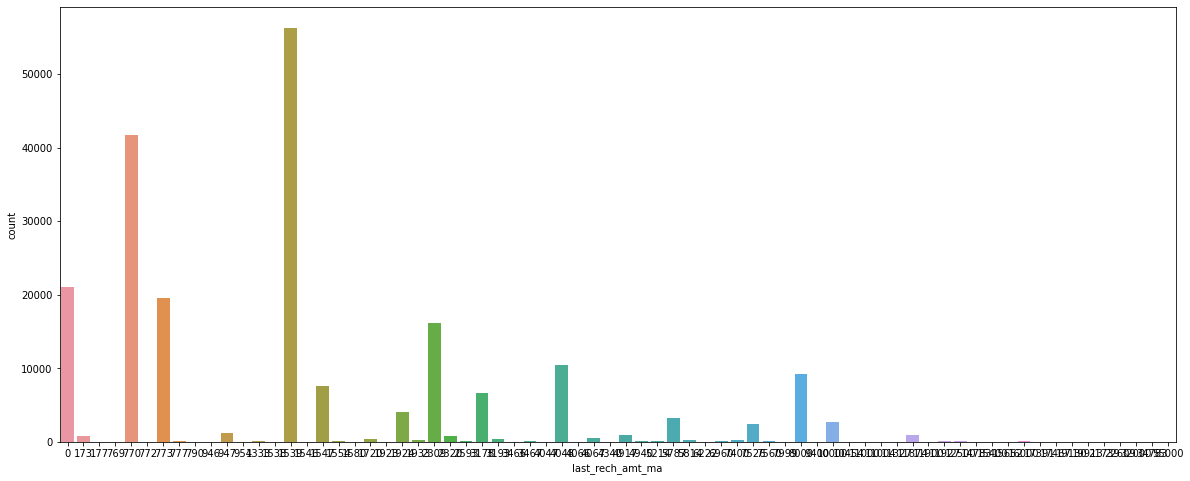

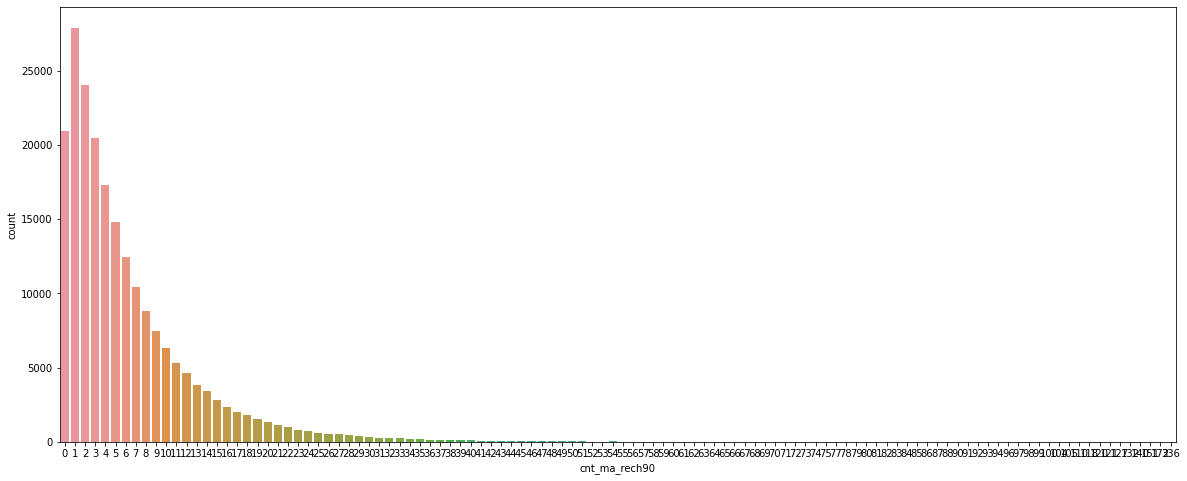

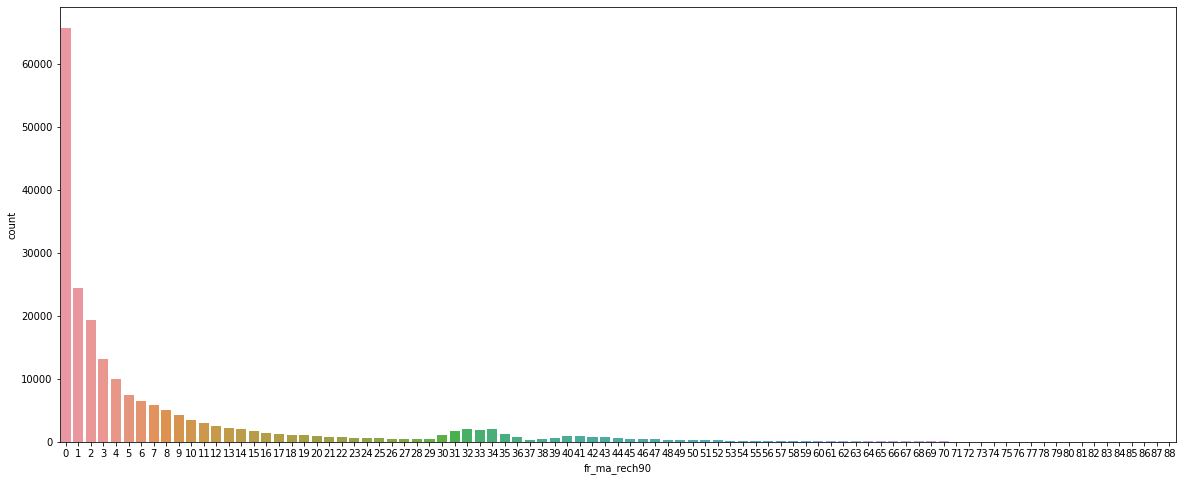

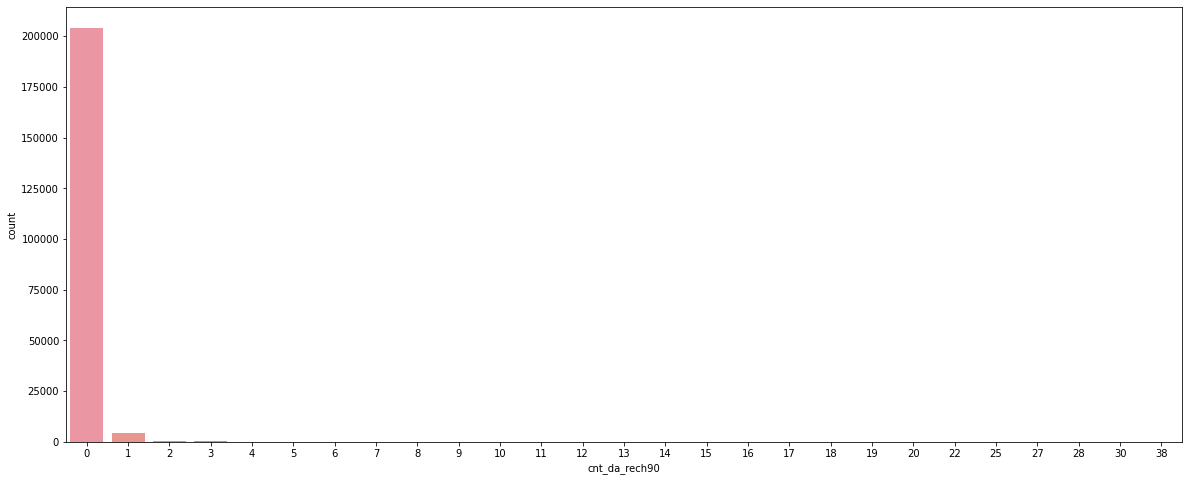

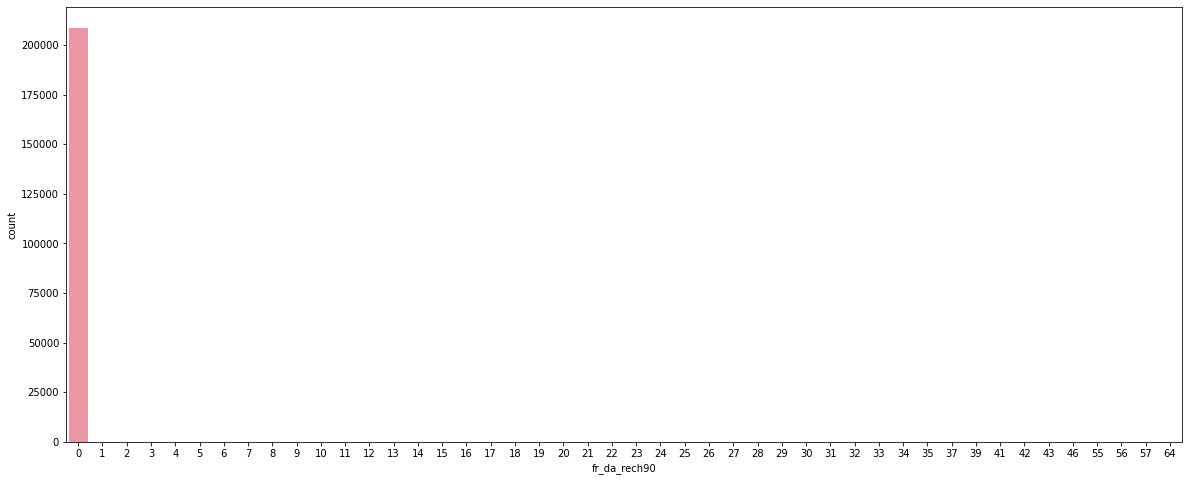

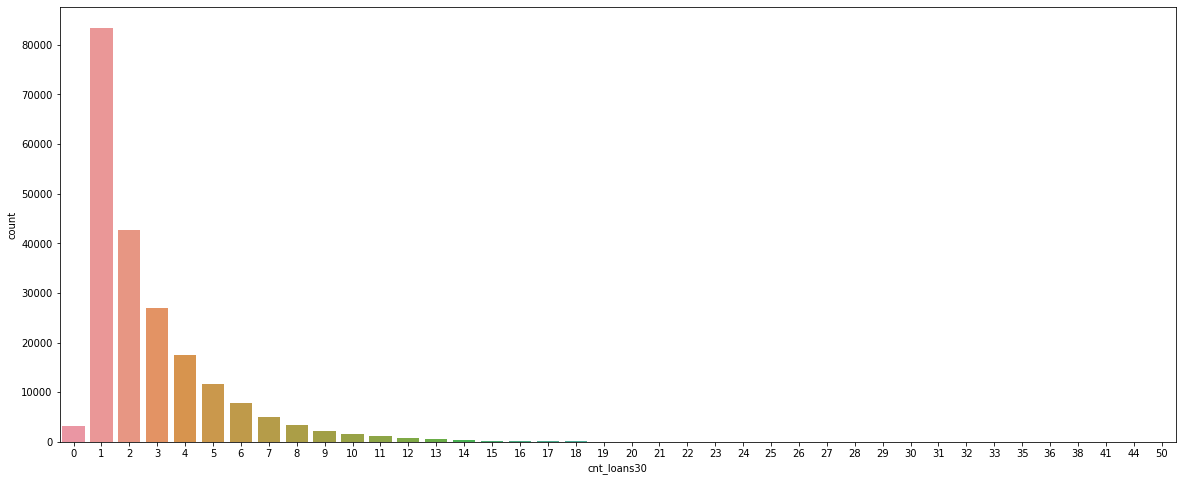

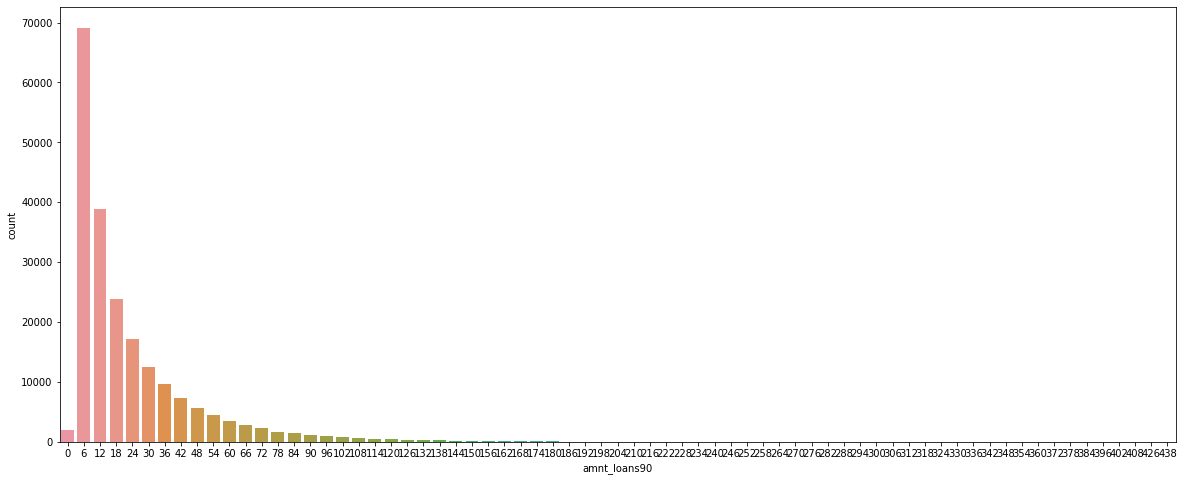

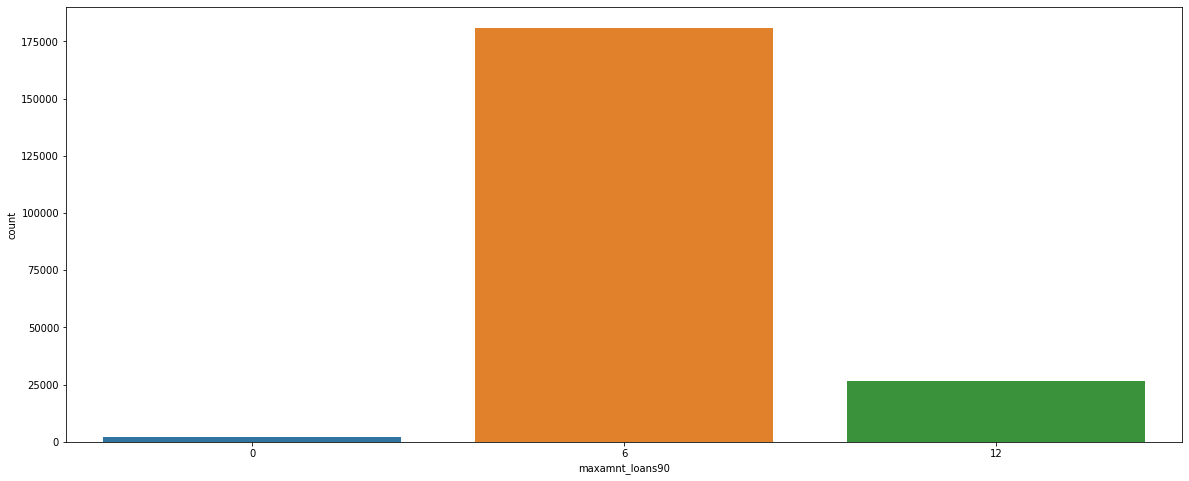

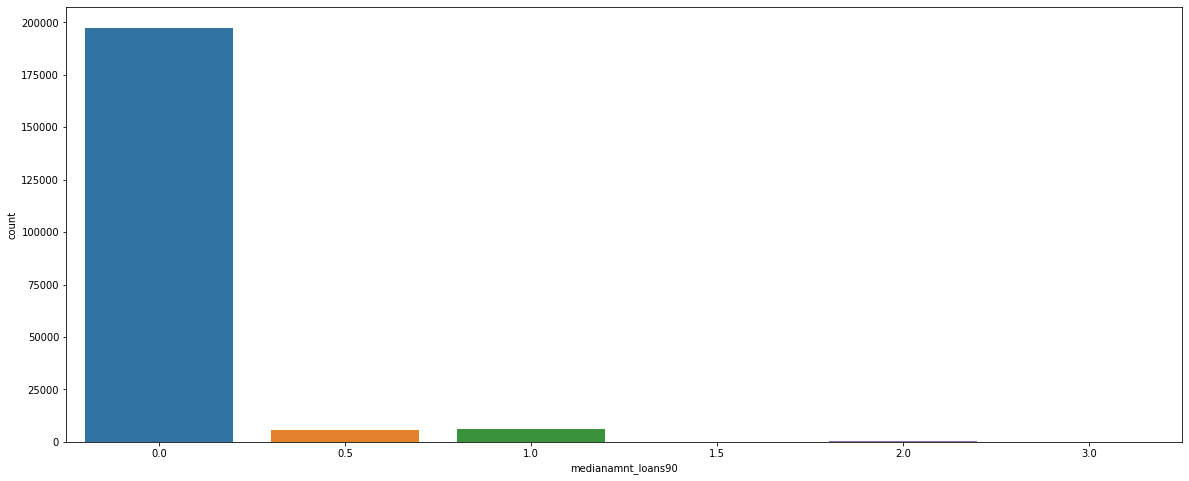

In [ ]:
#Lets plot the countplot of list of features 

list_of_col=['label', 'last_rech_amt_ma','cnt_ma_rech90', 'fr_ma_rech90',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
      'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', ]

for i in list_of_col:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df)
    plt.show()

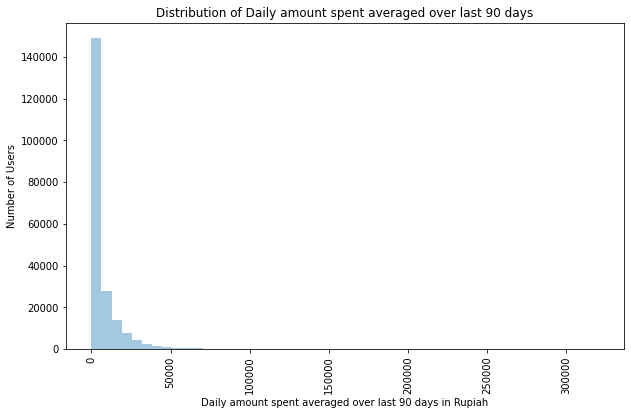

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df["daily_decr90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Daily amount spent averaged over last 90 days in Rupiah')
plt.ylabel('Number of Users')
plt.title('Distribution of Daily amount spent averaged over last 90 days');

here are many outlier values present in the Daily amount spent averaged over last 30/90 days column i.e. extremely high values, so we will remove them

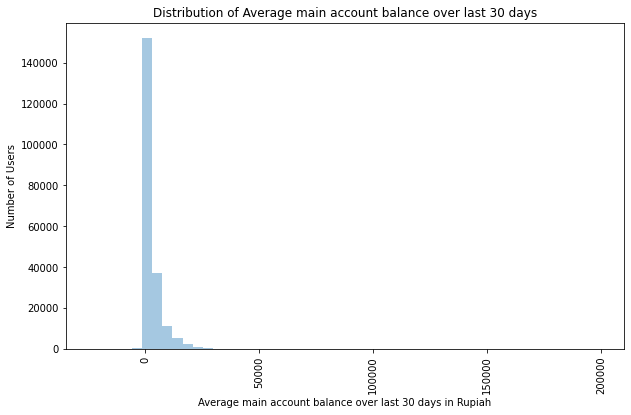

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df["rental30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Average main account balance over last 30 days in Rupiah')
plt.ylabel('Number of Users')
plt.title('Distribution of Average main account balance over last 30 days');

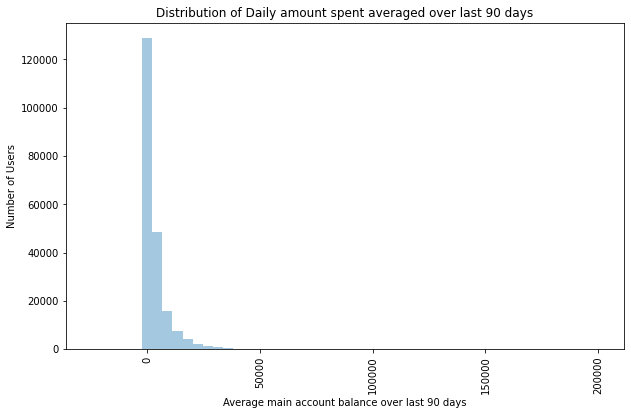

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df["rental90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Average main account balance over last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Daily amount spent averaged over last 90 days');

Most of the users have low Average main account balance or very few users have higher balance

Text(0.5, 1.0, 'Average main account balance over last 30 days in Rupiah vs Default Status - Boxplot')

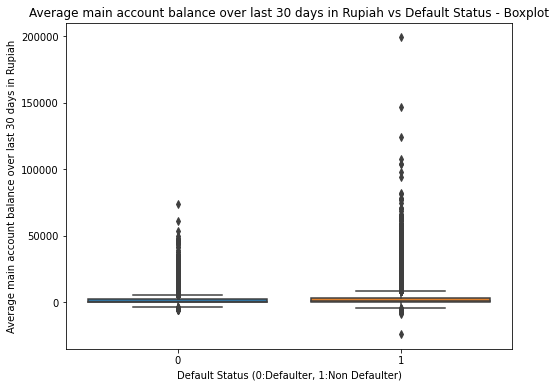

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="rental30",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Average main account balance over last 30 days in Rupiah')
plt.title('Average main account balance over last 30 days in Rupiah vs Default Status - Boxplot')

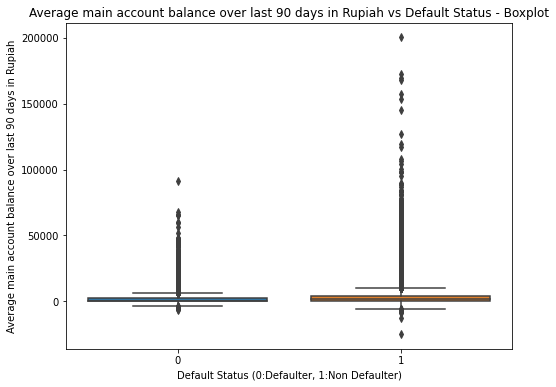

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="rental90",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Average main account balance over last 90 days in Rupiah')
plt.title('Average main account balance over last 90 days in Rupiah vs Default Status - Boxplot');

From the above plots, Average main account balance over last 30/90 days is relatively lower for the defaulters, this implies that people with higher average main account balance are generally more credible

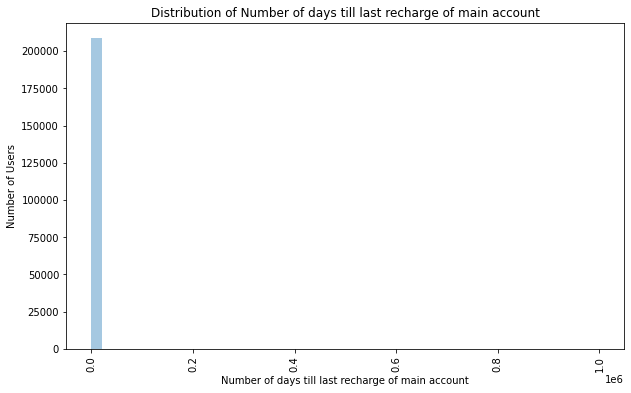

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df["last_rech_date_ma"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of days till last recharge of main account')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of days till last recharge of main account');

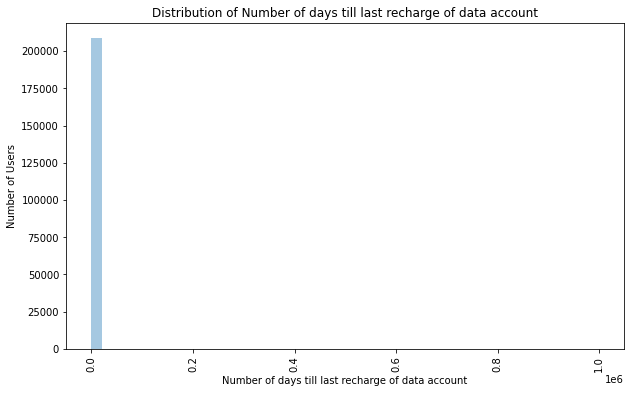

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df["last_rech_date_da"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of days till last recharge of data account')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of days till last recharge of data account');

Number of days till last recharge of main/data account columns contain a lot of garbage values i.e. extremely high float numbers and negative numbers so we will drop them

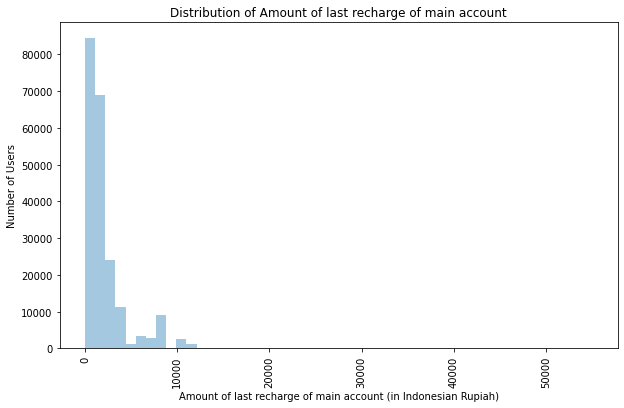

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df["last_rech_amt_ma"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Amount of last recharge of main account (in Indonesian Rupiah)')
plt.ylabel('Number of Users')
plt.title('Distribution of Amount of last recharge of main account');

Amount of last recharge of main account (in Indonesian Rupiah) contains many outliers, so we will emove all the values over 13000 Rupiah

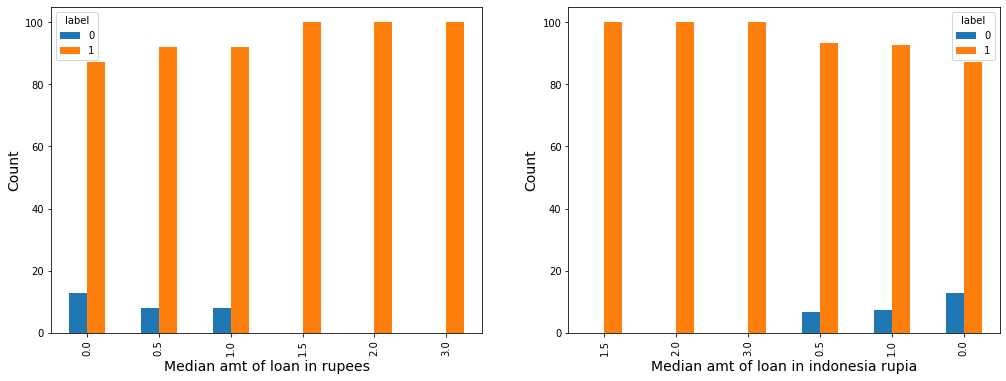

In [ ]:
table_medianamnt_loans90  = pd.crosstab(df['medianamnt_loans90'], df['label'])
table_medianamnt_loans30 = pd.crosstab(df['medianamnt_loans30'], df['label'])
table_maxamnt_loans90  = pd.crosstab(df['maxamnt_loans90'], df['label'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_medianamnt_loans90.div(table_medianamnt_loans90.sum(axis= 1),axis = 0)*100).sort_values(by= 1).plot(kind = 'bar',ax=ax);
plt.xlabel("Median amt of loan in rupees",fontsize = 14);
plt.ylabel('Count',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_medianamnt_loans30.div(table_medianamnt_loans30.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Median amt of loan in indonesia rupia",fontsize = 14);
plt.ylabel('Count',fontsize = 14);

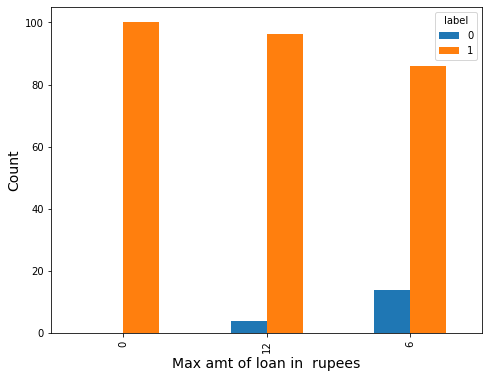

In [ ]:
fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,2)
(table_maxamnt_loans90.div(table_maxamnt_loans90.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Max amt of loan in  rupees",fontsize = 14);
plt.ylabel('Count',fontsize = 14);

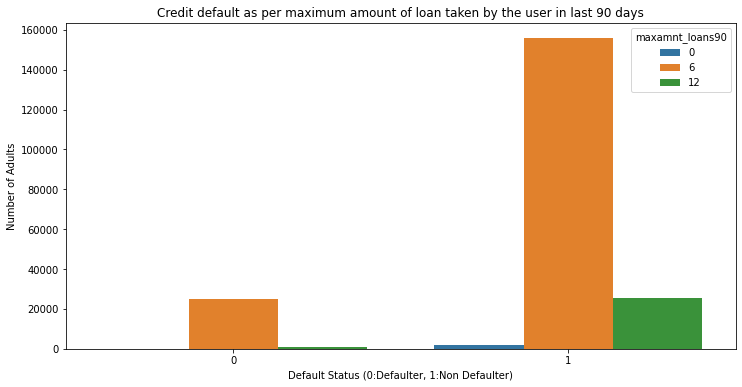

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="label",hue="maxamnt_loans90", data = df)
plt.ylabel('Number of Adults')
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.title('Credit default as per maximum amount of loan taken by the user in last 90 days');

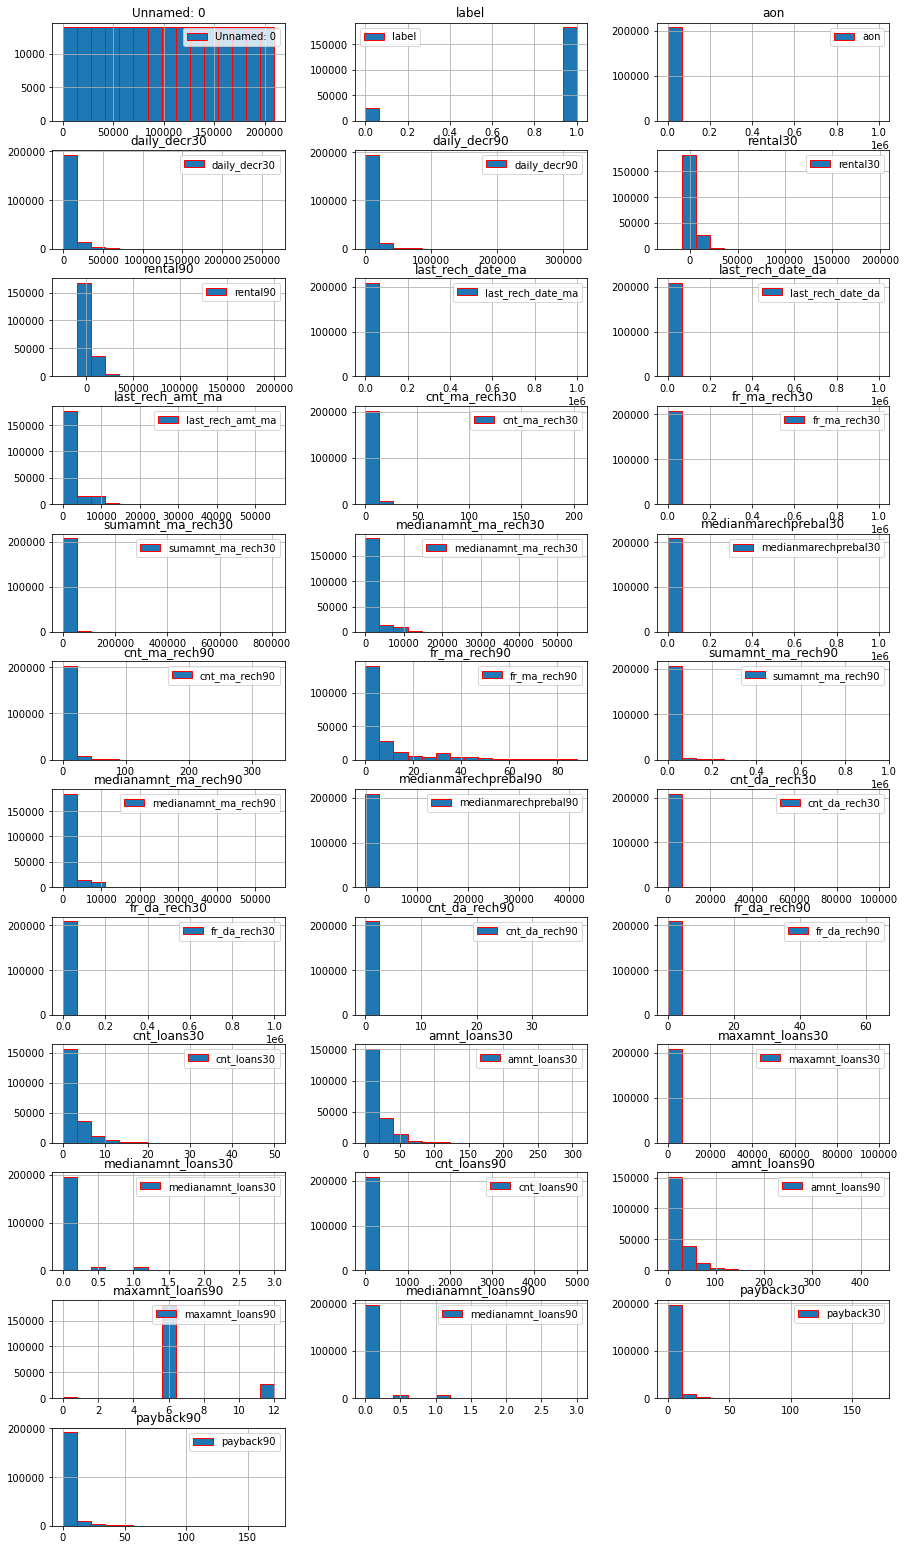

In [ ]:
df.hist(figsize=(15,30),edgecolor='red',layout=(13,3),bins=15,legend=True)
plt.show()

# Corealtion between features and target

In [ ]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
label,1.000000,-0.003787,0.168294,0.166147,0.058645,0.076034,0.003730,0.131805,0.237331,0.001330,...,0.072204,0.044590,0.004733,0.199788,0.084144,0.035747,0.048330,0.049178,0.006824,0.154948
aon,-0.003787,1.000000,0.001101,0.000371,-0.000796,-0.000693,0.001692,0.004253,-0.003152,-0.001163,...,-0.000692,0.004665,-0.000611,-0.002323,-0.001194,0.002772,0.001940,0.002203,0.000659,-0.001869
daily_decr30,0.168294,0.001101,1.000000,0.977704,0.441532,0.459200,0.000484,0.275836,0.451383,-0.000577,...,0.371585,-0.011611,0.008962,0.563495,0.400199,-0.037305,0.026921,0.047180,0.006481,0.518662
daily_decr90,0.166147,0.000371,0.977704,1.000000,0.434107,0.471894,0.000905,0.264130,0.426706,-0.000343,...,0.365176,-0.005592,0.009446,0.567203,0.397251,-0.034686,0.019405,0.040805,-0.021504,0.539409
rental30,0.058645,-0.000796,0.441532,0.434107,1.000000,0.955014,-0.001177,0.134436,0.235484,-0.001207,...,0.213064,-0.016536,0.004084,0.298886,0.234106,-0.035429,0.072889,0.094829,0.038310,0.362763
rental90,0.076034,-0.000693,0.459200,0.471894,0.955014,1.000000,-0.001781,0.127888,0.231900,-0.000525,...,0.224166,-0.009516,0.005183,0.327480,0.251250,-0.034113,0.067007,0.099261,0.010127,0.427715
last_rech_date_ma,0.003730,0.001692,0.000484,0.000905,-0.001177,-0.001781,1.000000,-0.000146,0.004308,-0.001629,...,-0.001354,0.001835,-0.000226,0.000867,-0.001124,0.002771,-0.002233,-0.001583,0.000557,-0.001213
last_rech_amt_ma,0.131805,0.004253,0.275836,0.264130,0.134436,0.127888,-0.000146,1.000000,-0.002661,0.002876,...,0.134298,0.028370,0.000093,0.014067,0.148459,0.021004,-0.027358,-0.014251,0.028886,0.096920
cnt_ma_rech30,0.237331,-0.003152,0.451383,0.426706,0.235484,0.231900,0.004308,-0.002661,1.000000,0.001669,...,0.169605,-0.067010,0.014703,0.685257,0.174105,-0.071451,0.043614,0.017358,0.068642,0.156148
fr_ma_rech30,0.001330,-0.001163,-0.000577,-0.000343,-0.001207,-0.000525,-0.001629,0.002876,0.001669,1.000000,...,-0.001359,-0.000331,0.003368,0.002634,-0.001890,-0.001292,0.001457,0.000999,0.000928,-0.001682


In [ ]:
# Coorelation with the Target Column Label 

df.corr()['label'].sort_values()

fr_da_rech90           -0.005418
medianmarechprebal30   -0.004829
aon                    -0.003787
fr_da_rech30           -0.000026
fr_ma_rech30            0.001330
cnt_da_rech90           0.002999
last_rech_date_ma       0.003730
cnt_da_rech30           0.003827
cnt_loans90             0.004733
Day                     0.006824
medianamnt_loans90      0.035747
medianmarechprebal90    0.039300
medianamnt_loans30      0.044590
payback30               0.048330
payback90               0.049178
rental30                0.058645
maxamnt_loans30         0.072204
rental90                0.076034
maxamnt_loans90         0.084144
fr_ma_rech90            0.084386
medianamnt_ma_rech90    0.120855
last_rech_amt_ma        0.131805
medianamnt_ma_rech30    0.141491
Month                   0.154948
daily_decr90            0.166147
daily_decr30            0.168294
cnt_loans30             0.196283
amnt_loans30            0.197272
amnt_loans90            0.199788
sumamnt_ma_rech30       0.202828
sumamnt_ma

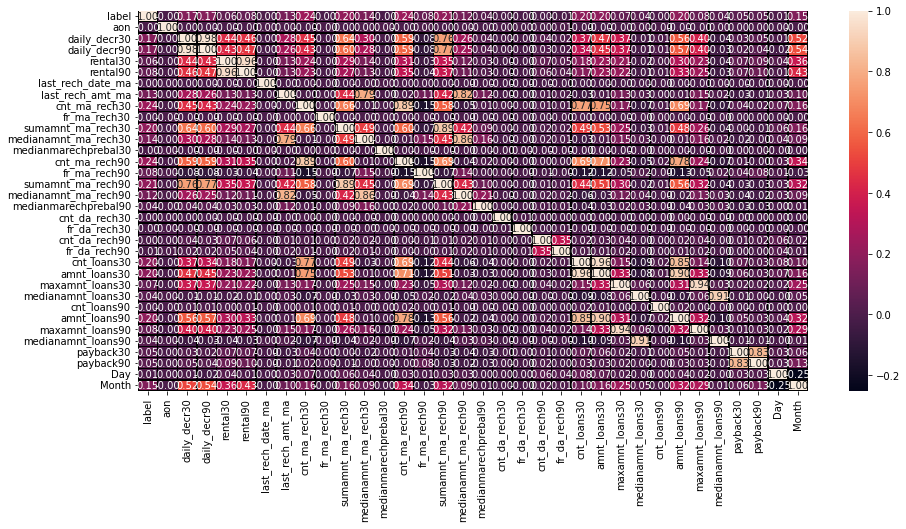

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

Dropping feature which are poorly correlated with label

In [ ]:
# Dropping feature which are poorly correlated with label

df.drop(['Day','cnt_loans90','cnt_da_rech90','cnt_da_rech30','fr_ma_rech30','fr_da_rech30','fr_ma_rech90'], axis =1,inplace =True)

# Descriptive Statistics

In [ ]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month
count,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,...,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000
mean,0.875177,8112.845675,5381.442003,6082.558196,2715.373669,3509.498048,3756.143760,2064.458973,3.978053,7704.496570,...,2.758975,17.951992,6.624585,0.054029,23.645397,6.703138,0.046078,3.398639,4.321302,6.797321
std,0.330519,75696.211355,9220.627165,10918.820723,4294.267480,5754.644314,53906.000830,2370.790003,4.256099,10139.645685,...,2.554507,17.379778,2.198065,0.218039,26.469924,2.103869,0.200692,8.813330,10.307791,0.741437
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1.000000,246.000000,42.452250,42.693333,299.700000,330.000000,1.000000,770.000000,1.000000,1540.000000,...,1.000000,6.000000,6.000000,0.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,527.000000,1469.091833,1500.000000,1095.740000,1347.210000,3.000000,1539.000000,3.000000,4628.000000,...,2.000000,12.000000,6.000000,0.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000
75%,1.000000,982.000000,7244.096000,7802.795000,3362.352500,4204.572500,7.000000,2309.000000,5.000000,10010.000000,...,4.000000,24.000000,6.000000,0.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,810096.000000,...,50.000000,306.000000,12.000000,3.000000,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000


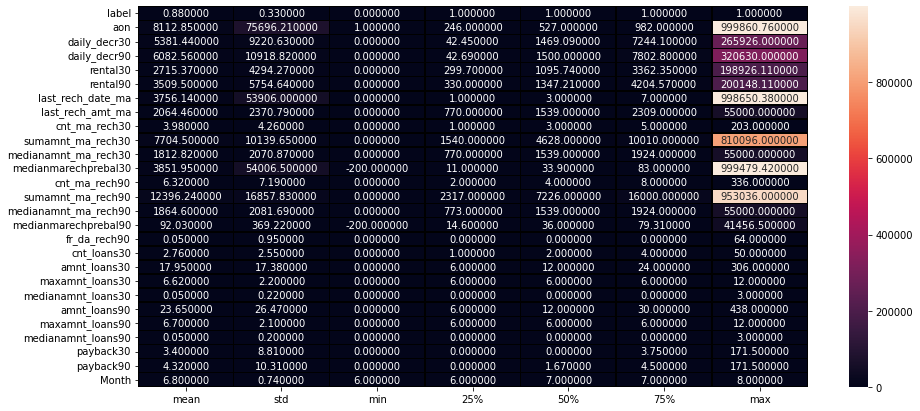

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.5,linecolor="black", fmt='f')

Observations:

1.  We can observe that some of the dataset features are ordinal or binary, whereas other features are continous.
2.  We can observe that some columns have negative values like rental30 and renatal90 given our data these values can be negative, wherer as some other columns like aon, daily_decr30, daily_decr90, last_rech_date_ma, last_rech_date_da these columns can not have negative values as these values do not make any sence in ourdataset.

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209592 entries, 0 to 209592
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209592 non-null  int64  
 1   aon                   209592 non-null  float64
 2   daily_decr30          209592 non-null  float64
 3   daily_decr90          209592 non-null  float64
 4   rental30              209592 non-null  float64
 5   rental90              209592 non-null  float64
 6   last_rech_date_ma     209592 non-null  float64
 7   last_rech_amt_ma      209592 non-null  int64  
 8   cnt_ma_rech30         209592 non-null  int64  
 9   sumamnt_ma_rech30     209592 non-null  float64
 10  medianamnt_ma_rech30  209592 non-null  float64
 11  medianmarechprebal30  209592 non-null  float64
 12  cnt_ma_rech90         209592 non-null  int64  
 13  sumamnt_ma_rech90     209592 non-null  int64  
 14  medianamnt_ma_rech90  209592 non-null  float64
 15  

# Checking Data To Remove Skewness

In [ ]:
my_column1 = df.pop('label')
df.insert(26,'label', my_column1) 


df.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,label
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,3078.0,1539.0,...,12,6.0,0.0,12,6,0.0,29.000000,29.000000,7,0
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,5787.0,5787.0,...,12,12.0,0.0,12,12,0.0,0.000000,0.000000,8,1
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,1539.0,1539.0,...,6,6.0,0.0,6,6,0.0,0.000000,0.000000,8,1
3,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,...,12,6.0,0.0,12,6,0.0,0.000000,0.000000,6,1
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,20029.0,2309.0,...,42,6.0,0.0,42,6,0.0,2.333333,2.333333,6,1


In [ ]:
df.iloc[:,:-1].skew()

aon                     10.392926
daily_decr30             3.946235
daily_decr90             4.252567
rental30                 4.560502
rental90                 4.467271
last_rech_date_ma       14.790939
last_rech_amt_ma         3.781141
cnt_ma_rech30            3.283838
sumamnt_ma_rech30        6.386774
medianamnt_ma_rech30     3.512314
medianmarechprebal30    14.779840
cnt_ma_rech90            3.425244
sumamnt_ma_rech90        4.897937
medianamnt_ma_rech90     3.752696
medianmarechprebal90    44.880396
fr_da_rech90            28.988013
cnt_loans30              2.713426
amnt_loans30             2.975720
maxamnt_loans30          1.241873
medianamnt_loans30       4.551031
amnt_loans90             3.149999
maxamnt_loans90          1.678297
medianamnt_loans90       4.895707
payback30                8.311500
payback90                6.900427
Month                    0.343245
dtype: float64

In [ ]:
from sklearn.preprocessing import power_transform
x_new=power_transform(df.iloc[:,:-1],method='yeo-johnson')

df.iloc[:,:-1]=pd.DataFrame(x_new,columns=df.iloc[:,:-1].columns)

In [ ]:
df.iloc[:,:-1].skew()

aon                     -0.298544
daily_decr30            -0.130642
daily_decr90            -0.120634
rental30                -0.040545
rental90                -0.041336
last_rech_date_ma        0.012086
last_rech_amt_ma        -0.061271
cnt_ma_rech30           -0.000148
sumamnt_ma_rech30       -0.291326
medianamnt_ma_rech30    -0.189630
medianmarechprebal30    -0.119067
cnt_ma_rech90           -0.002472
sumamnt_ma_rech90       -0.192167
medianamnt_ma_rech90    -0.044608
medianmarechprebal90     7.506233
fr_da_rech90            15.469625
cnt_loans30              0.036243
amnt_loans30             0.001945
maxamnt_loans30          0.422675
medianamnt_loans30       3.447715
amnt_loans90            -0.008992
maxamnt_loans90          0.364276
medianamnt_loans90       3.779576
payback30                0.298554
payback90                0.210877
Month                    0.076425
dtype: float64

In [ ]:
df.isnull().sum()

aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_amt_ma        0
cnt_ma_rech30           0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
Month                   0
label                   0
dtype: int64

In [ ]:
df.dropna(inplace=True)

# Outliers Checking

aon                        AxesSubplot(0.125,0.830974;0.133621x0.049026)
daily_decr30            AxesSubplot(0.285345,0.830974;0.133621x0.049026)
daily_decr90             AxesSubplot(0.44569,0.830974;0.133621x0.049026)
rental30                AxesSubplot(0.606034,0.830974;0.133621x0.049026)
rental90                AxesSubplot(0.766379,0.830974;0.133621x0.049026)
last_rech_date_ma          AxesSubplot(0.125,0.772143;0.133621x0.049026)
last_rech_amt_ma        AxesSubplot(0.285345,0.772143;0.133621x0.049026)
cnt_ma_rech30            AxesSubplot(0.44569,0.772143;0.133621x0.049026)
sumamnt_ma_rech30       AxesSubplot(0.606034,0.772143;0.133621x0.049026)
medianamnt_ma_rech30    AxesSubplot(0.766379,0.772143;0.133621x0.049026)
medianmarechprebal30       AxesSubplot(0.125,0.713312;0.133621x0.049026)
cnt_ma_rech90           AxesSubplot(0.285345,0.713312;0.133621x0.049026)
sumamnt_ma_rech90        AxesSubplot(0.44569,0.713312;0.133621x0.049026)
medianamnt_ma_rech90    AxesSubplot(0.606034,0.7133

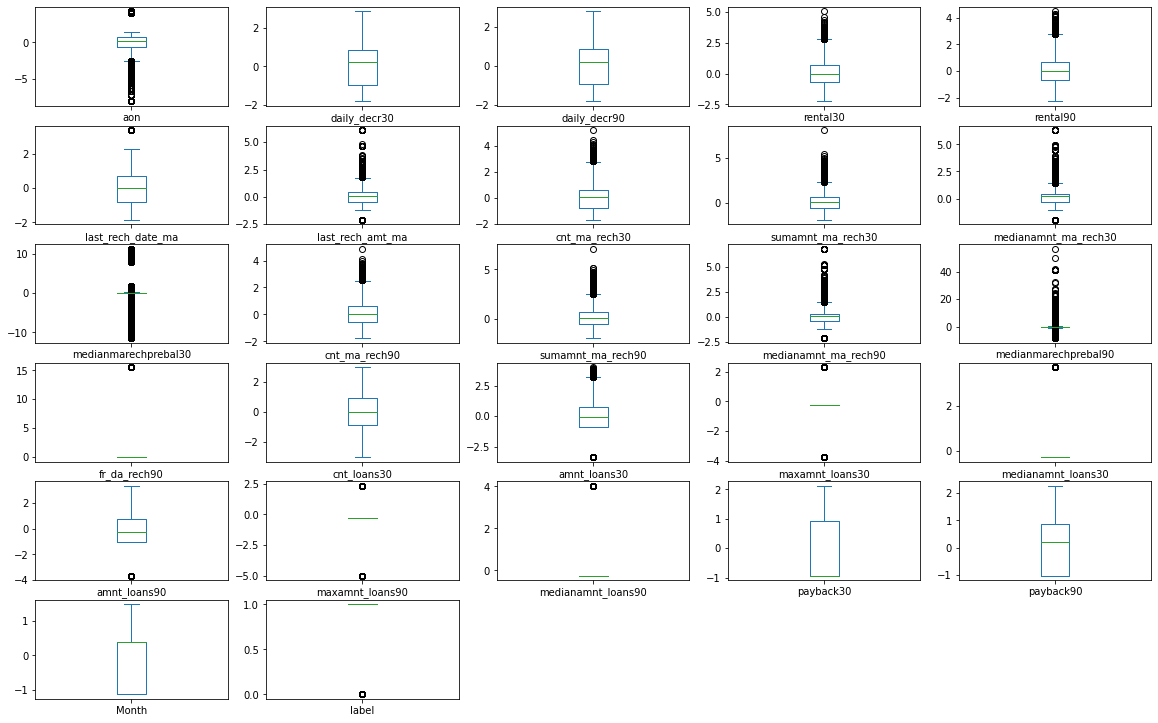

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df.plot(kind='box',subplots=True, layout=(13,5), figsize=[20,28])

# IQR Proximity Rule
Z - Score Technique

In [ ]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(209592, 27)

In [ ]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [ ]:
len(np.where(z>3)[0])

0

In [ ]:
df.shape

(209592, 27)

# Feature Engineering ( Variantion Inflation Factor )

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df.corr()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,label
aon,1.000000,0.119756,0.120284,0.077757,0.085755,0.066993,0.095682,0.051647,0.087541,0.095476,...,0.087986,0.033091,-0.001034,0.125856,0.039712,-0.010192,0.098423,0.129046,0.087962,0.023513
daily_decr30,0.119756,1.000000,0.998270,0.582158,0.638342,0.136149,0.377626,0.497647,0.555852,0.389903,...,0.393546,0.299840,0.008316,0.524414,0.321641,-0.029691,0.327550,0.402932,0.845555,0.063756
daily_decr90,0.120284,0.998270,1.000000,0.582336,0.643558,0.140024,0.377114,0.492908,0.550268,0.386638,...,0.387394,0.298655,0.009966,0.525083,0.322193,-0.029330,0.324898,0.403548,0.856501,0.064418
rental30,0.077757,0.582158,0.582336,1.000000,0.973328,0.070316,0.286547,0.454374,0.480524,0.324584,...,0.338076,0.209729,-0.023689,0.413668,0.223935,-0.051007,0.306401,0.341661,0.431210,0.032546
rental90,0.085755,0.638342,0.643558,0.973328,1.000000,0.102492,0.297792,0.445685,0.468934,0.315707,...,0.325718,0.216139,-0.018382,0.428695,0.235204,-0.050417,0.302990,0.358322,0.515583,0.036871
last_rech_date_ma,0.066993,0.136149,0.140024,0.070316,0.102492,1.000000,0.524010,0.016961,0.144503,0.342486,...,-0.085764,-0.016534,0.033045,-0.034116,-0.008825,0.026774,-0.075769,-0.005820,0.091341,0.020233
last_rech_amt_ma,0.095682,0.377626,0.377114,0.286547,0.297792,0.524010,1.000000,0.326580,0.654057,0.811070,...,0.161890,0.132082,0.036400,0.198880,0.143626,0.023815,0.143454,0.180069,0.162010,0.060328
cnt_ma_rech30,0.051647,0.497647,0.492908,0.454374,0.445685,0.016961,0.326580,1.000000,0.858187,0.421506,...,0.693407,0.181037,-0.048268,0.686763,0.185520,-0.062673,0.542721,0.487309,0.203762,0.081057
sumamnt_ma_rech30,0.087541,0.555852,0.550268,0.480524,0.468934,0.144503,0.654057,0.858187,1.000000,0.781721,...,0.575404,0.230632,-0.014180,0.585799,0.240316,-0.033062,0.435784,0.413101,0.221904,0.082583
medianamnt_ma_rech30,0.095476,0.389903,0.386638,0.324584,0.315707,0.342486,0.811070,0.421506,0.781721,1.000000,...,0.211740,0.148667,0.039306,0.247370,0.161004,0.021958,0.192704,0.228702,0.152256,0.062722


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5]),
 <a list of 27 Text major ticklabel objects>)

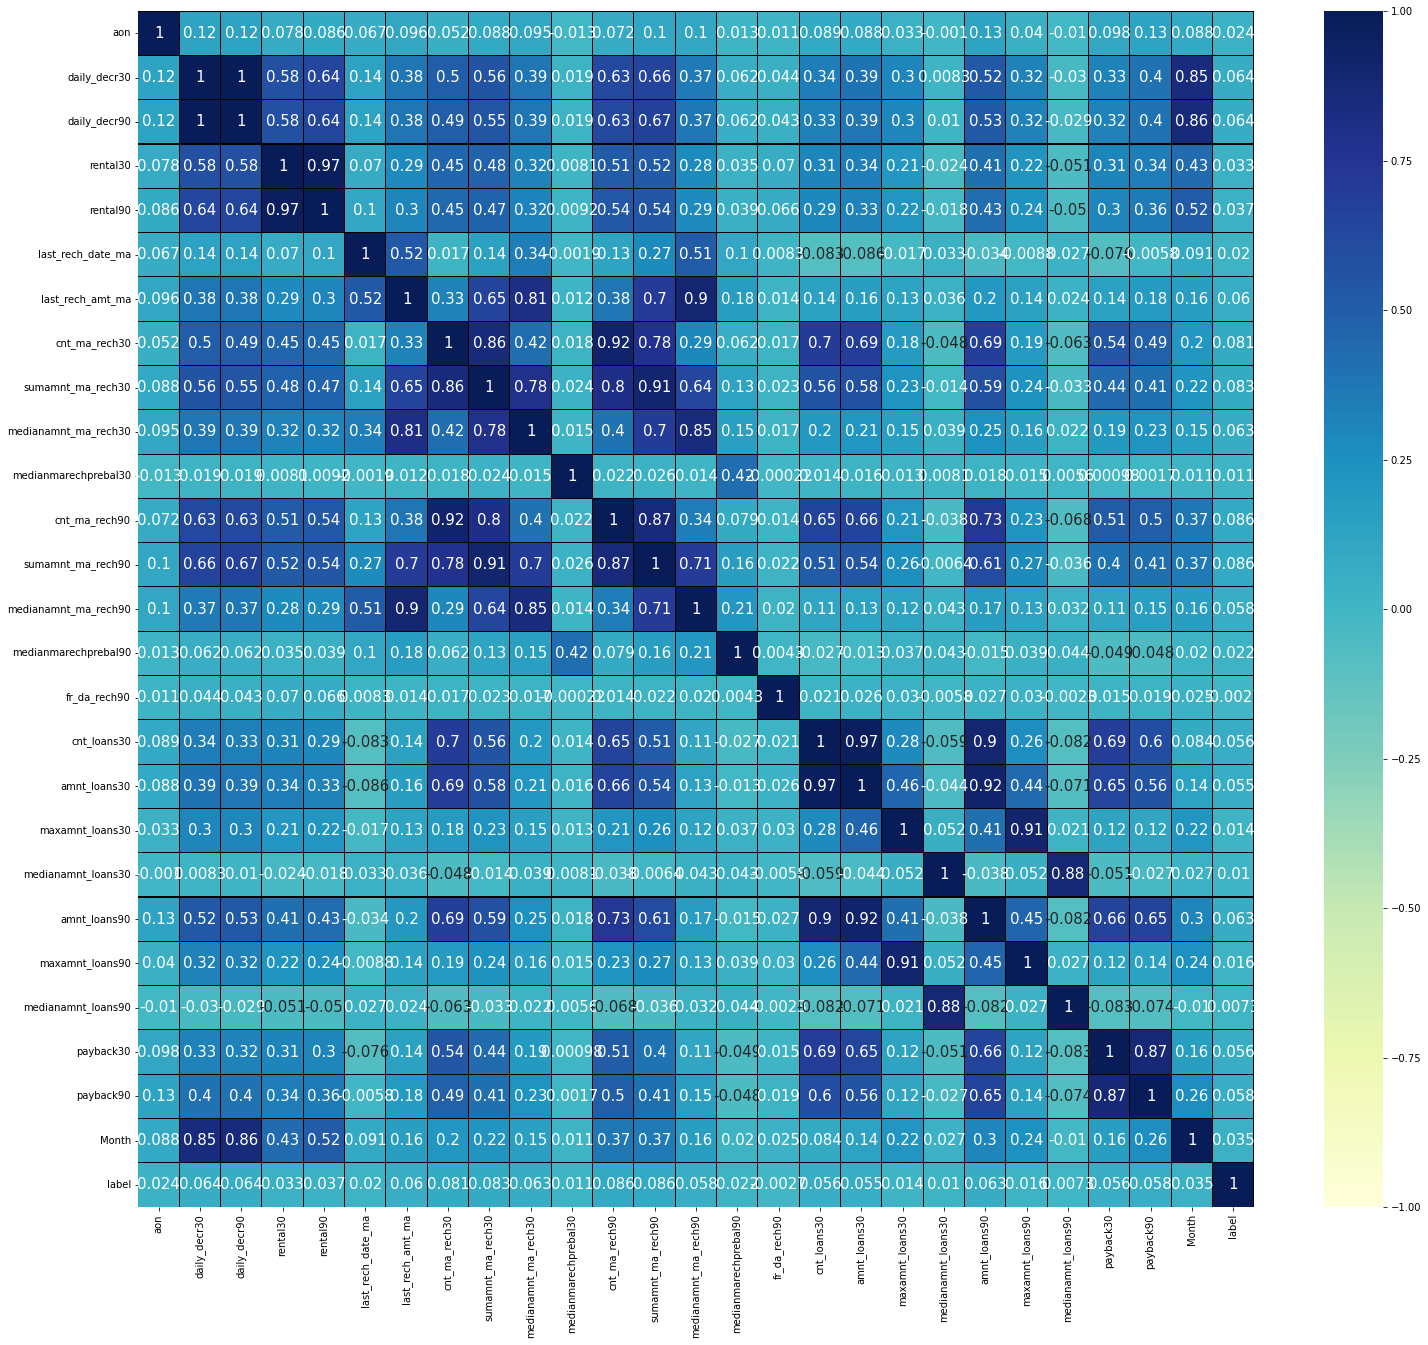

In [ ]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

In [ ]:
x=df.drop('label',axis=1)
y=df['label']

In [ ]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month
0,-0.510570,0.492217,0.469617,-0.805171,-0.794581,-0.300490,0.083414,-0.275613,-0.177902,0.208595,...,0.011779,-0.097558,-0.245447,-0.269052,-0.250846,-0.285612,-0.248272,1.813283,1.783984,0.397525
1,0.410196,1.106125,1.059052,0.774496,0.614540,1.424931,1.501272,-0.799350,0.219814,1.632399,...,-0.913014,-0.097558,2.301610,-0.269052,-0.250846,2.325822,-0.248272,-0.937403,-1.018914,1.480130
2,0.150759,0.179857,0.165296,-0.120251,-0.216863,0.026234,0.083414,-0.799350,-0.535357,0.208595,...,-0.913014,-0.894778,-0.245447,-0.269052,-1.005710,-0.285612,-0.248272,-0.937403,-1.018914,1.480130
3,-0.636223,-1.124024,-1.121770,-0.937954,-0.989417,1.823792,-0.291054,-1.694154,-1.902186,-1.961726,...,0.011779,-0.097558,-0.245447,-0.269052,-0.250846,-0.285612,-0.248272,-0.937403,-1.018914,-1.133993
4,0.657940,-0.586125,-0.585936,-0.007660,-0.111529,0.259907,0.449547,0.992271,1.262659,0.575164,...,1.570452,1.454952,-0.245447,-0.269052,1.097886,-0.285612,-0.248272,0.639251,0.431450,-1.133993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209587,-0.115529,-0.583590,-0.583429,-0.012758,-0.116294,-0.814670,1.051179,0.096125,0.664003,0.903881,...,0.011779,-0.097558,-0.245447,-0.269052,-0.250846,-0.285612,-0.248272,0.095010,-0.098296,-1.133993
209588,0.764599,-0.984476,-0.982006,0.264096,0.141818,0.259907,-0.429511,0.384546,-0.175306,-0.303311,...,0.556353,0.393240,-0.245447,-0.269052,0.192263,-0.285612,-0.248272,0.095010,-0.098296,-1.133993
209589,0.714882,1.095040,1.050685,1.123110,1.247768,0.026234,0.083414,0.620255,0.575769,0.208595,...,0.924663,1.454952,2.301610,-0.269052,1.358454,2.325822,-0.248272,0.974308,0.752953,0.397525
209590,1.147609,1.120339,1.075701,-0.522903,-0.169982,-0.300490,-0.429511,0.620255,0.795556,-0.303311,...,0.011779,0.393240,2.301610,-0.269052,0.503742,2.325822,-0.248272,-0.937403,1.337848,0.397525


In [ ]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209587    1
209588    1
209589    1
209590    1
209591    1
Name: label, Length: 209591, dtype: int64

In [ ]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [ ]:
vif_calc()

    VIF Factor              features
0     1.040534                   aon
1   421.543360          daily_decr30
2   476.802276          daily_decr90
3    26.156033              rental30
4    29.386254              rental90
5     1.870115     last_rech_date_ma
6     6.523507      last_rech_amt_ma
7    55.551670         cnt_ma_rech30
8    87.766894     sumamnt_ma_rech30
9    17.393739  medianamnt_ma_rech30
10    1.225854  medianmarechprebal30
11   61.416674         cnt_ma_rech90
12   82.649654     sumamnt_ma_rech90
13   18.203478  medianamnt_ma_rech90
14    1.305954  medianmarechprebal90
15    1.008023          fr_da_rech90
16   80.065708           cnt_loans30
17   87.680771          amnt_loans30
18    8.030315       maxamnt_loans30
19    4.589745    medianamnt_loans30
20   15.169217          amnt_loans90
21    8.848714       maxamnt_loans90
22    4.601301    medianamnt_loans90
23    5.536407             payback30
24    5.178100             payback90
25    6.738869                 Month


In [ ]:
# Dropping the irrelevant columns..

x.drop(columns=["daily_decr90"], axis=1, inplace=True)

In [ ]:
# Dropping the irrelevant columns..

x.drop(columns=["amnt_loans30"], axis=1, inplace=True)

In [ ]:
# Dropping the irrelevant columns..

x.drop(columns=["sumamnt_ma_rech30"], axis=1, inplace=True)

In [ ]:
# Dropping the irrelevant columns..

x.drop(columns=["rental90"], axis=1, inplace=True)

In [ ]:
# Dropping the irrelevant columns..33

x.drop(columns=["amnt_loans90"], axis=1, inplace=True)

In [ ]:
# Dropping the irrelevant columns..

x.drop(columns=["cnt_ma_rech90"], axis=1, inplace=True)

In [ ]:
# Dropping the irrelevant columns..

x.drop(columns=["sumamnt_ma_rech90"], axis=1, inplace=True)

In [ ]:
vif_calc()

    VIF Factor              features
0     1.033962                   aon
1     7.486940          daily_decr30
2     1.629492              rental30
3     1.550496     last_rech_date_ma
4     6.064787      last_rech_amt_ma
5     2.886929         cnt_ma_rech30
6     4.390702  medianamnt_ma_rech30
7     1.225202  medianmarechprebal30
8     7.494435  medianamnt_ma_rech90
9     1.299267  medianmarechprebal90
10    1.006873          fr_da_rech90
11    3.140066           cnt_loans30
12    6.181981       maxamnt_loans30
13    4.565654    medianamnt_loans30
14    6.123818       maxamnt_loans90
15    4.566328    medianamnt_loans90
16    5.326988             payback30
17    4.617425             payback90
18    5.220321                 Month


# Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,medianamnt_ma_rech90,medianmarechprebal90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month
0,-0.510578,0.492211,-0.805175,-0.300488,0.083412,-0.275613,0.208595,-0.041300,0.146193,-0.325838,-0.064375,0.011779,-0.245448,-0.269053,-0.285612,-0.248273,1.813278,1.783979,0.397519
1,0.410190,1.106121,0.774492,1.424930,1.501267,-0.799350,1.632396,0.016926,1.682259,-0.002720,-0.064375,-0.913012,2.301603,-0.269053,2.325816,-0.248273,-0.937407,-1.018919,1.480125
2,0.150752,0.179851,-0.120255,0.026236,0.083412,-0.799350,0.208595,0.020766,0.146193,0.023771,-0.064375,-0.913012,-0.245448,-0.269053,-0.285612,-0.248273,-0.937407,-1.018919,1.480125
3,-0.636232,-1.124033,-0.937957,1.823791,-0.291055,-1.694152,-1.961721,-0.063970,-0.253804,-0.370965,-0.064375,0.011779,-0.245448,-0.269053,-0.285612,-0.248273,-0.937407,-1.018919,-1.134000
4,0.657935,-0.586133,-0.007664,0.259908,0.449544,0.992268,0.575163,-0.011177,0.783544,-0.142975,-0.064375,1.570449,-0.245448,-0.269053,-0.285612,-0.248273,0.639246,0.431445,-1.134000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209586,-0.115536,-0.583598,-0.012762,-0.814666,1.051175,0.096123,0.903879,0.037462,0.894042,0.145343,-0.064375,0.011779,-0.245448,-0.269053,-0.285612,-0.248273,0.095005,-0.098301,-1.134000
209587,0.764594,-0.984485,0.264092,0.259908,-0.429512,0.384544,-0.303310,0.073687,-0.400933,0.234991,-0.064375,0.556352,-0.245448,-0.269053,-0.285612,-0.248273,0.095005,-0.098301,-1.134000
209588,0.714877,1.095035,1.123105,0.026236,0.083412,0.620252,0.208595,0.009245,0.146193,-0.075341,-0.064375,0.924661,2.301603,-0.269053,2.325816,-0.248273,0.974303,0.752949,0.397519
209589,1.147605,1.120335,-0.522906,-0.300488,-0.429512,0.620252,-0.303310,0.074916,0.585176,0.182589,-0.064375,0.011779,2.301603,-0.269053,2.325816,-0.248273,-0.937407,1.337843,0.397519


# MODELLING FOR INCOME
# Building CLASSIFICATION Model As Target Column's Has only Two Outputs

1    183429
0     26162
Name: label, dtype: int64


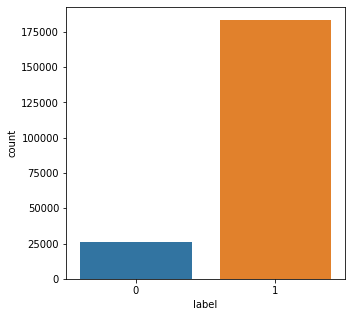

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['label'].value_counts())  
plt.figure(figsize=(5,5))
sns.countplot(df['label'])
plt.show()

# OverSampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE()
x, y = sm.fit_resample(x,y)
y.value_counts()

0    183429
1    183429
Name: label, dtype: int64

# Modelling
# Getting the best random state

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=44)

# Logistic Regression

In [ ]:
# Checking Accuracy for Logistic Regression
log = LogisticRegression()
log.fit(x_train,y_train)

#Prediction
predlog = log.predict(x_test)

print(accuracy_score(y_test, predlog)*100)
print(confusion_matrix(y_test, predlog))
print(classification_report(y_test,predlog))

55.8541859746679
[[26703 28381]
 [20205 34769]]
              precision    recall  f1-score   support

           0       0.57      0.48      0.52     55084
           1       0.55      0.63      0.59     54974

    accuracy                           0.56    110058
   macro avg       0.56      0.56      0.56    110058
weighted avg       0.56      0.56      0.56    110058



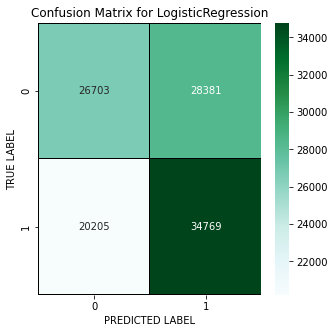

In [ ]:
# Plotting Confusion_Matrix
cm = confusion_matrix(y_test,predlog)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

# Random Forest Classifier

In [61]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

90.73670246597248
[[48198  6886]
 [ 3309 51665]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90     55084
           1       0.88      0.94      0.91     54974

    accuracy                           0.91    110058
   macro avg       0.91      0.91      0.91    110058
weighted avg       0.91      0.91      0.91    110058



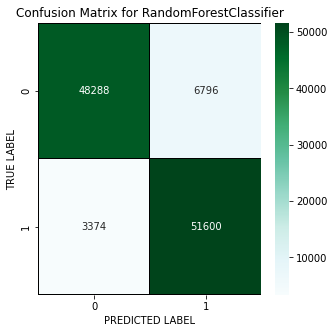

In [ ]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


# Decission Tree Classifier

In [66]:
# Checking Accuracy for Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

#Prediction
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc)*100)
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

82.46197459521343
[[46416  8668]
 [10634 44340]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83     55084
           1       0.84      0.81      0.82     54974

    accuracy                           0.82    110058
   macro avg       0.83      0.82      0.82    110058
weighted avg       0.83      0.82      0.82    110058



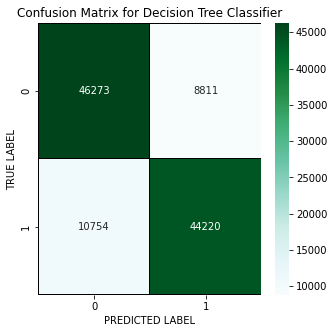

In [ ]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,preddtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Support Vector Machine Classifier

In [ ]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc)*100)
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

KeyboardInterrupt: ignored

In [ ]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# Gradient Boosting Classifier

In [ ]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB)*100)
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

81.28713950825927
[[41843 13241]
 [ 7354 47620]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80     55084
           1       0.78      0.87      0.82     54974

    accuracy                           0.81    110058
   macro avg       0.82      0.81      0.81    110058
weighted avg       0.82      0.81      0.81    110058



In [ ]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')

# Cross Validation Score

In [67]:

# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x,y,cv=5).mean()*100)

# cv score for Random Forest Classifier
print(cross_val_score(rf,x,y,cv=5).mean()*100)

# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean()*100)

82.27435638498059
90.95810391293473
81.03818796780195


It is clear from the above that Random Forest Classifier is working the best with respect to Cross validation score as well which is minimum in the case..

So we move forward with Random Forest Classifier Model

# HyperParameter Tuning for the model with best score

In [ ]:
#Random Forest Classifier

parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [ ]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [ ]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
Incomee =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
Incomee.fit(x_train, y_train)
pred = Incomee.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

73.81289865343727


# Plotting ROC and compare AUC for the final model

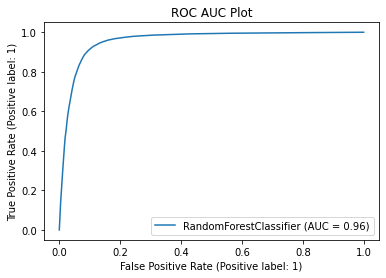

In [62]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# Saving the model

In [63]:
import joblib
joblib.dump(Incomee,"Census_Income.pkl")

['Census_Income.pkl']

# Conclusion:
# The accuracy score for Label is 96 %